In [14]:
#1. Import libraries/packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
#2. Loading the data
data = pd.read_csv('dataset/Fish.csv')
print(data.sample(5))
print(data.shape)
print(data.isnull().sum())
print(data.columns)
data.dropna()
print(data.shape)
X = data[['Length1','Length2','Length3','Height','Width']]
y = data['Weight']


       Species  Weight  Length1  Length2  Length3   Height   Width
133       Pike   345.0     36.0     38.5     41.0   6.3960  3.9770
58   Whitefish   540.0     28.5     31.0     34.0  10.7440  6.5620
93       Perch   145.0     20.7     22.7     24.2   5.9532  3.6300
125      Perch  1100.0     40.1     43.0     45.5  12.5125  7.4165
152      Smelt     9.9     11.3     11.8     13.1   2.2139  1.1659
(159, 7)
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')
(159, 7)


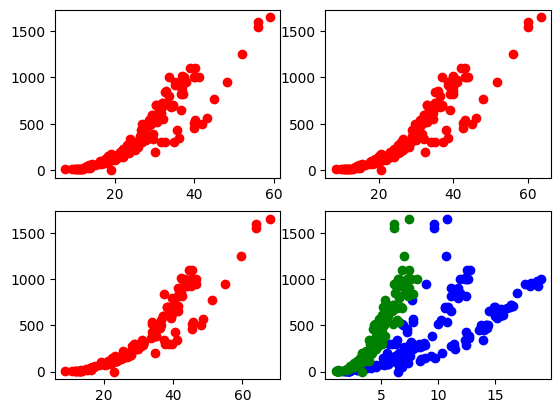

In [18]:
#3. Visualizing the data
plt.subplot(2,2,1)
plt.scatter(X['Length1'],y,color='red',label='Length1')
plt.subplot(2,2,2)
plt.scatter(X['Length2'],y,color='red',label='Length2')
plt.subplot(2,2,3)
plt.scatter(X['Length3'],y,color='red',label='Length3')
plt.subplot(2,2,4)
plt.scatter(X['Height'],y,color='blue',label='Height')
plt.scatter(X['Width'],y,color='green',label='Width')
plt.show()

In [23]:
#4. Splitting our Data set in Dependent and Independent variables.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=15)

In [24]:

#5. Performing simple linear regression 
regressor= LinearRegression()
regressor.fit(X_train,y_train)
#Test Accuracy
accuracy = regressor.score(X_test,y_test)
print("\n\n Accuracy of model =",accuracy)
print("Coeficients",regressor.coef_)
print("Intercepts",regressor.intercept_)





 Accuracy of model = 0.8620751150305616
Coeficients [ 75.29014525 -17.79874926 -29.92560952  29.07379943  23.97274323]
Intercepts -504.2563373385958


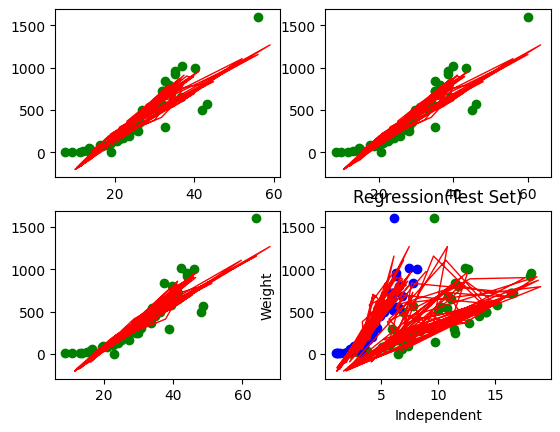

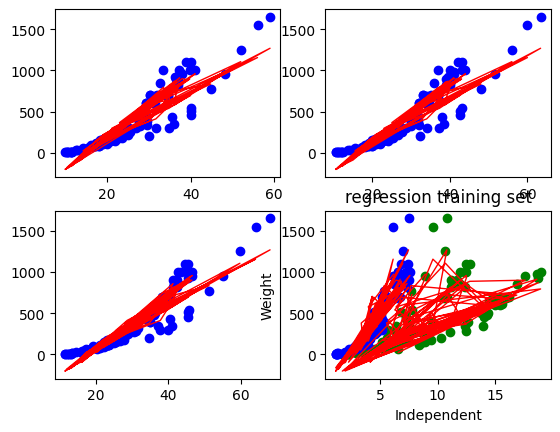

In [39]:
#6. Residual analysis(Check the results of model fitting to know whether the model is satisfactory)

plt.subplot(2,2,1)
plt.scatter(X_test['Length1'],y_test,color='green')
plt.plot(X_train['Length1'],regressor.predict(X_train),color="red",linewidth=1)

plt.subplot(2,2,2)
plt.scatter(X_test['Length2'],y_test,color='green')
plt.plot(X_train['Length2'],regressor.predict(X_train),color="red",linewidth=1)

plt.subplot(2,2,3)
plt.scatter(X_test['Length3'],y_test,color='green')
plt.plot(X_train['Length3'],regressor.predict(X_train),color="red",linewidth=1)

plt.subplot(2,2,4)
plt.scatter(X_test['Height'],y_test,color='green')
plt.scatter(X_test['Width'],y_test,color='blue')
plt.plot(X_train[['Height']],regressor.predict(X_train),color="red",linewidth=1)
plt.plot(X_train[['Width']],regressor.predict(X_train),color="red",linewidth=1)

plt.title('Regression(Test Set)')
plt.xlabel('Independent')
plt.ylabel('Weight')
plt.show()



plt.subplot(2,2,1)
plt.scatter(X_train['Length1'],y_train,color="blue")
plt.plot(X_train['Length1'],regressor.predict(X_train),color="red",linewidth=1)
plt.subplot(2,2,2)
plt.scatter(X_train['Length2'],y_train,color="blue")
plt.plot(X_train['Length2'],regressor.predict(X_train),color="red",linewidth=1)
plt.subplot(2,2,3)
plt.scatter(X_train['Length3'],y_train,color="blue")
plt.plot(X_train['Length3'],regressor.predict(X_train),color="red",linewidth=1)
plt.subplot(2,2,4)
plt.scatter(X_train['Height'],y_train,color="green")
plt.scatter(X_train['Width'],y_train,color="blue")
plt.plot(X_train[['Height']],regressor.predict(X_train),color="red",linewidth=1)
plt.plot(X_train[['Width']],regressor.predict(X_train),color="red",linewidth=1)

plt.title('regression training set')
plt.xlabel('Independent')
plt.ylabel('Weight')
plt.show()


In [28]:
#7. Predictions on the test set (apply the model)
y_pred=regressor.predict(X_test)
print(f"r2 score {r2_score(y_test,y_pred)}")
print(f"mean error { mean_squared_error(y_test,y_pred)}")

x = [[23.2,25.4,30,11.52,4.02]]
Weight=regressor.predict(x)
print(f"Weight will be : {Weight}")

r2 score 0.8620751150305616
mean error 16600.06941020929
Weight will be : [323.91911287]


c:\python\python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
